# Section 1

Run a Linear Discriminant Analysis based on quantitative environmental variables (see previous exercises), using the Douro, Tejo , Mondego and Minho basins as the pre determined groups. Produce a biplot with ‘ Catchment_name ’ as a grouping variable.

In [58]:
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
df = df.dropna() # drops rows when at least one element is a missing value
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2822 entries, 18 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 3.6+ MB


,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
18,ES_03_0001,41.957268,-2.926857,Spain,Douro,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
19,ES_03_0002,41.850818,-2.591150,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
28,ES_03_0012,41.498026,-5.528753,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
32,ES_03_0016,41.586853,-3.072064,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
43,ES_03_0029,41.830177,-3.782420,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0


c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


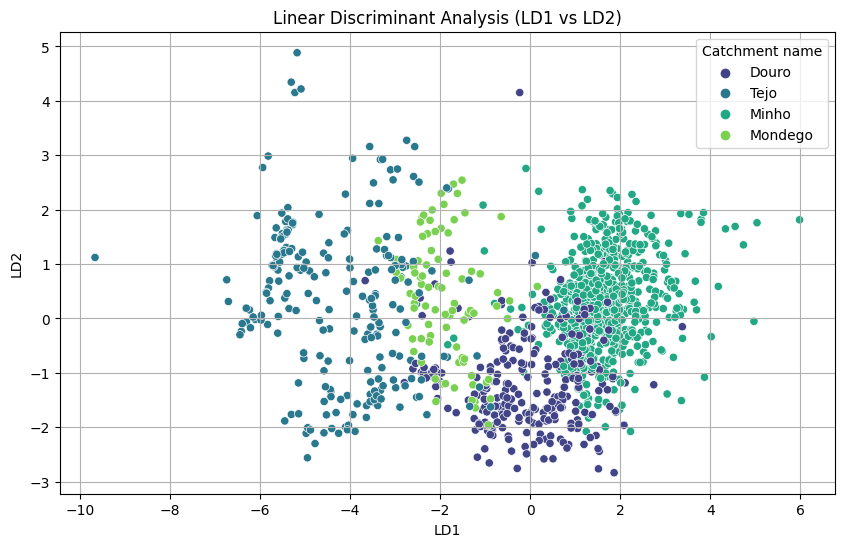

In [73]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar columnas relevantes y Catchment_names específicas
quantitative_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
group_var = 'Catchment_name'
catchments_of_interest = ['Douro', 'Tejo', 'Mondego', 'Minho']
df_filtered = df[df[group_var].isin(catchments_of_interest)]

df_filtered = df_filtered.dropna(subset=quantitative_vars) 

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtered[quantitative_vars])

# Instanciar el modelo LDA
lda = LinearDiscriminantAnalysis(n_components=2)

# Ajustar el modelo LDA
y = df_filtered[group_var]
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
lda_fit = lda.fit(X_scaled, y_encoded)

# Transformar los datos
X_lda = lda.transform(X_scaled)

# Crear un DataFrame con los resultados del LDA y el 'Catchment_name' agrupado
lda_df = pd.DataFrame(data=X_lda, columns=['LD1', 'LD2'])
lda_df['Catchment_name'] = y.values

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.title('Linear Discriminant Analysis (LD1 vs LD2)')
sns.scatterplot(x='LD1', y='LD2', hue='Catchment_name', data=lda_df, palette='viridis')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(title='Catchment name')
plt.grid(True)
plt.show()



# Section 2
Try to build interactive plots that display data in the space defined by the Discriminant Functions.

In [75]:
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
from bokeh.palettes import Viridis

In [77]:
# Preparar los datos para Bokeh
source = ColumnDataSource(lda_df)
catchments = lda_df['Catchment_name'].unique()
color_map = factor_cmap(field_name='Catchment_name', palette=Viridis[len(catchments)], factors=catchments)

# Crear el gráfico interactivo
plot = figure(title="Linear Discriminant Analysis (LD1 vs LD2)", height=600, width=1000)
plot.scatter(x='LD1', y='LD2', source=source, legend_field='Catchment_name', fill_alpha=0.6, size=10, color=color_map)

# Configurar etiquetas y leyenda
plot.legend.location = 'bottom_right'
plot.xaxis.axis_label = 'LD1'
plot.yaxis.axis_label = 'LD2'

# Mostrar el gráfico
output_file("lda_biplot.html")
show(plot)

In [79]:
import plotly.express as px
# Crear el gráfico interactivo con plotly.express
fig = px.scatter(lda_df, x='LD1', y='LD2', color='Catchment_name', hover_name='Catchment_name',
                 width=1000, height=500, size_max=45, marginal_y='box')

# Mostrar el gráfico
fig.show()

In [80]:
import altair as alt

# Crear el gráfico interactivo con Altair
chart = alt.Chart(lda_df).mark_circle().encode(
    x=alt.X('LD1:Q', title='LD1'),  # Especificar el eje X
    y=alt.Y('LD2:Q', title='LD2'),  # Especificar el eje Y
    color=alt.Color('Catchment_name:N', title='Catchment Name'),  # Especificar el color
    tooltip=['Catchment_name', 'LD1', 'LD2']  # Añadir información al pasar el mouse
).interactive()  # Hacer el gráfico interactivo

# Mostrar el gráfico
chart.show()

alt.Chart(...)